# ML Assignment 2 - Sample Code
* 雲端硬碟: https://drive.google.com/drive/folders/1Qhr6vo5zB3hdzpEZ8oG243FlVhLYfn4X?usp=sharing
* 蘭花競賽網站: https://tbrain.trendmicro.com.tw/Competitions/Details/20

## 執行方式
依作業要求，在圖像轉換或修改模型架構區塊更改程式碼，更改完成後，可以直接全部執行。
訓練過程及輸出位於最後面。


## 初始設定

In [330]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


記得修改cd路徑 這邊ai cup是我自訂的資料夾名稱，副檔會直接產生在colab notebooks下，所以將ai cup這個路徑去掉在執行

In [332]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [333]:
from __future__ import print_function, division

import time
import os
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.hub import load_state_dict_from_url
import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.ion()   # interactive mode
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

## 圖像轉換
### 題目
torchvision.transforms 提供了許多可靠的 API來讓使用者對圖像進行操作，請試著在 data_transforms 當中對訓練集進行轉換(圖像前處理)，當模型訓練到一定程度時，驗證看看使用該方法是否確實對模型準確率造成影響，然後試著解釋使用該轉換方法會對模型訓練產生什麼影響。

* 至少嘗試使用 **五種** 不同的圖像轉換方法，並且找出最佳的方法組合。(使用方法數量為加分bonus的依據)
* 須在報告中註明每一個方法 **在未使用時的準確率**、**使用後的準確率**，並 **說明該方法的目的** 及 **最終最佳組合的準確率**。

### 說明
請在註解區塊中寫入圖像轉換的方法。


In [334]:
from torchvision.transforms.transforms import Normalize
data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((224,224) ),
            ########在此區塊填入圖像轉換方法########
            torchvision.transforms.RandomHorizontalFlip(p=0.5),
            transforms.ToTensor(),
            #transforms.ColorJitter(brightness = (1, 10),contrast = (1, 10),saturation = (1, 10), hue=(0.2, 0.4)),
            #torchvision.transforms.RandomVerticalFlip(p=0.5)
            #torchvision.transforms.RandomGrayscale(p=0.1),
            #transforms.RandomErasing(p=1.0, scale=(0.2, 0.3), ratio=(0.5, 1.0), value=(0, 0, 255)),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ########################################
            
        ]),
        'val': transforms.Compose([
            transforms.Resize((224,224) ),
            transforms.ToTensor(),
            
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            
            
            
        ]),
    }

## 修改模型架構
### 第一題 題目
在本次作業範例中我們使用了CNN來做為整個分類模型的架構。請以第一題中最佳的圖像轉換方法組合，並基於CNN架構增加或減少模型的隱藏層，並觀察修改模型後對原先準確率的影響(即修改模型的意思)

* 至少使用 **三種** 不同隱藏層或不同的修改模型方法(增加或減少模型的隱藏層，並且找出最佳的模型架構。(修改方法多寡為加分bonus的依據)
* 須在報告中註明每一個方法 **在更改前的準確率**、 **更改後的準確率** 及 **最終最佳模型架構的準確率**。

### 說明
* 因為模型有套用預訓練的參數，所以更改模型的方式比較複雜，

* 請勿直接更改現有隱藏層的參數(輸入、輸出大小等等)，請用增加或減少的方式來修改模型架構。

* 請注意並計算各隱藏層可接受的輸出入大小，以免產生資料維度前後層對不上的問題。


In [335]:

class MyCNN(nn.Module):

  def __init__(self, num_classes=1000):
    super(MyCNN, self).__init__()
    self.features = nn.Sequential(
      #============== 在此區塊新增或減少隱藏層 =================
      
      nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
      #torch.nn.BatchNorm2d(),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(64, 192, kernel_size=5, padding=2),

      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(192, 384, kernel_size=3, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),
      nn.LeakyReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      torch.nn.BatchNorm2d(256),

      #============================================================
    )
    self.features2 = nn.Sequential(
      #============== 可在此區塊新增隱藏層 =====================

    
      #===========================================================
    )
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
      #============== 在此區塊新增或減少隱藏層 =================
      nn.Dropout(),
      nn.Linear(256*6*6, 4096),
      nn.ReLU(inplace=True),
      nn.Dropout(),
      nn.Linear(4096, 4096),
      nn.ReLU(inplace=True),
      #nn.Linear(4096, num_classes), # 原始模型輸出層
      #===========================================================
    )
    self.classifier2 = nn.Sequential(
      #============== 可在此區塊新增隱藏層 =====================
      


      #===========================================================
      nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.features(x)
    #print("feature1:")
    #print (x.size())
    x = self.features2(x)
    #print("feather2")
    #print(x.size())
    x = self.avgpool(x)
    #print("avgpool")
    #print(x.size())
    x = torch.flatten(x, 1)
    #print("flatten")
    #print(x.size())
    x = self.classifier(x)
    #print("classifier")
    #print(x.size())
    x = self.classifier2(x)
    #print("classifier2")
    #print(x.size())

    return x
    
  

In [336]:

class MyCNN(nn.Module):
    def __init__(self,num_classes): 
        super(MyCNN,self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=2,stride=2,padding=3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )
        self.block2 = nn.Sequential(
          nn.MaxPool2d(1,1),
          ResidualBlock(64,64),
          ResidualBlock(64,64,2)
        )
        self.block3 = nn.Sequential(
            ResidualBlock(64,128),
            ResidualBlock(128,128,2)
        )
        self.block4 = nn.Sequential(
            ResidualBlock(128,256),
            ResidualBlock(256,256,2)
        )
        self.block5 = nn.Sequential(
            ResidualBlock(256,512),
            ResidualBlock(512,512,2)
        )
        self.avgpool = nn.AvgPool2d(2) 
        # vowel_diacritic 
        self.fc1 = nn.Linear(8192,64)
        # grapheme_root
        self.fc2 = nn.Linear(8192,64)
        # consonant_diacritic
        self.fc3 = nn.Linear(8192,64)

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avgpool(x)
        x = x.view(x.size(0),-1)
        x1 = self.fc1(x)
        x2 = self.fc2(x)
        x3 = self.fc3(x)
        return x1,x2,x3

class ResidualBlock(nn.Module):

    def __init__(self,in_channels,out_channels,stride=1,kernel_size=3,padding=1,bias=False):
        super(ResidualBlock,self).__init__()
        self.cnn1 = nn.Sequential(nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding,bias=False), nn.BatchNorm2d(out_channels), nn.ReLU(True) )

        self.cnn2 = nn.Sequential( nn.Conv2d(out_channels,out_channels,kernel_size,1,padding,bias=False), nn.BatchNorm2d(out_channels) ) 

        if stride != 1 or in_channels != out_channels: 
            self.shortcut = nn.Sequential( nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=stride,bias=False), nn.BatchNorm2d(out_channels) ) 
        else: 
            self.shortcut = nn.Sequential() 

    def forward(self,x): 
        residual = x 
        x = self.cnn1(x) 
        x = self.cnn2(x) 
        x += self.shortcut(residual) 
        x = nn.ReLU(True)(x) 
        return x


'\nclass MyCNN(nn.Module):\n    def __init__(self,num_classes): \n        super(MyCNN,self).__init__()\n        self.block1 = nn.Sequential(\n            nn.Conv2d(3,64,kernel_size=2,stride=2,padding=3,bias=False),\n            nn.BatchNorm2d(64),\n            nn.ReLU(True)\n        )\n        self.block2 = nn.Sequential(\n          nn.MaxPool2d(1,1),\n          ResidualBlock(64,64),\n          ResidualBlock(64,64,2)\n        )\n        self.block3 = nn.Sequential(\n            ResidualBlock(64,128),\n            ResidualBlock(128,128,2)\n        )\n        self.block4 = nn.Sequential(\n            ResidualBlock(128,256),\n            ResidualBlock(256,256,2)\n        )\n        self.block5 = nn.Sequential(\n            ResidualBlock(256,512),\n            ResidualBlock(512,512,2)\n        )\n        self.avgpool = nn.AvgPool2d(2) \n        # vowel_diacritic \n        self.fc1 = nn.Linear(8192,64)\n        # grapheme_root\n        self.fc2 = nn.Linear(8192,64)\n        # consonant_diac

## 訓練模型區塊
包含視覺化模型及訓練模型。

In [337]:
def visualize_model(model, device, dataloaders, class_names, num_images=6):
  was_training = model.training
  model.eval()
  images_so_far = 0

  plt.figure(figsize=(18,9))

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['val']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.size()[0]):
        images_so_far += 1

        img_display = np.transpose(inputs.cpu().data[j].numpy(), (1,2,0)) #numpy:CHW, PIL:HWC
        plt.subplot(num_images//2,2,images_so_far),plt.imshow(img_display) #nrow,ncol,image_idx
        plt.title(f'predicted: {class_names[preds[j]]}')
        plt.savefig("test.jpg")
        if images_so_far == num_images:
            model.train(mode=was_training)
            plt.clf()
            return
    plt.clf()
    model.train(mode=was_training)

def imshow(inp, title=None):
  """Imshow for Tensor."""
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  
  #原先Normalize是對每個channel個別做 減去mean, 再除上std
  inp1 = std * inp + mean

  plt.imshow(inp)

  if title is not None:
      plt.title(title)
  plt.pause(0.001)  # pause a bit so that plots are updated
  plt.imshow(inp1)
  if title is not None:
      plt.title(title)
  plt.clf()


def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [338]:
def train_model(model, criterion, device, dataloaders, dataset_sizes, optimizer, scheduler, num_epochs=25):
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  train_loss, valid_loss = [], []
  train_acc, valid_acc = [], []

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()  # Set model to training mode
      else:
        model.eval()   # Set model to evaluate mode

      running_loss = 0.0
      running_corrects = 0

      # Iterate over data.
      for inputs, labels in tqdm(dataloaders[phase]):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward
        # track history if only in train
        with torch.set_grad_enabled(phase == 'train'):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase
            if phase == 'train':
                # zero the parameter gradients
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
      if phase == 'train':
        scheduler.step()

      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double() / dataset_sizes[phase]

      if phase == 'train':
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
      else:
        valid_loss.append(epoch_loss)
        valid_acc.append(epoch_acc)

      print('{} Loss: {:.4f} Acc: {:.4f}'.format(
        phase, epoch_loss, epoch_acc))

      # deep copy the model
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())


  plt.figure(0)
  plt.plot(range(1,num_epochs+1,1), np.array(train_loss), 'r-', label= "train loss") #relative global step
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.savefig(f"./train_loss.png")
  plt.clf()

  plt.figure(1)
  plt.plot(range(1,num_epochs+1,1), np.array(valid_loss), 'b-', label= "eval loss") #--evaluate_during_training True 在啟用eval
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.savefig(f"./eval_loss.png")
  plt.clf()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc))

  # load best model weights
  model.load_state_dict(best_model_wts)
  torch.save(model.state_dict(),"model.pt")
  return model

## 訓練參數 (可調整)
* num_epochs: 訓練回合數
* lr: 訓練速度(learning rate)
* batch_size: 批次(batch)大小

In [339]:
num_epochs = 20
lr = 0.001
batch_size = 64

## 主函式

Using device cpu



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


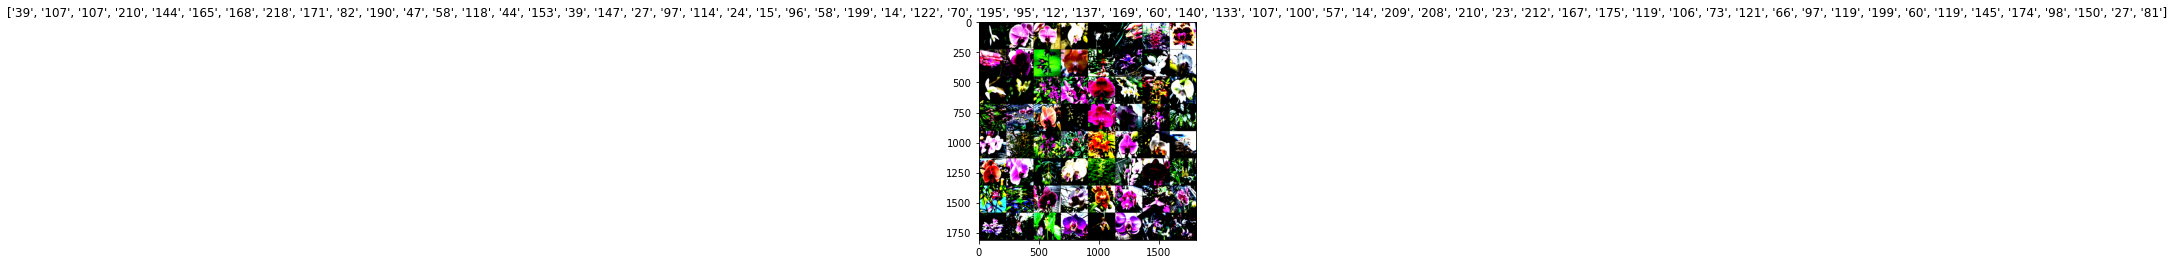

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
features.13.weight
features.13.bias
features.13.running_mean
features.13.running_var
features.13.num_batches_tracked
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier2.0.weight
classifier2.0.bias
#parameters:57901595
batch_size:64
Epoch 1/20
----------


100%|██████████| 24/24 [02:37<00:00,  6.56s/it]


train Loss: 5.3864 Acc: 0.0111


100%|██████████| 11/11 [00:30<00:00,  2.79s/it]


val Loss: 5.1755 Acc: 0.0457
Epoch 2/20
----------


100%|██████████| 24/24 [02:25<00:00,  6.05s/it]


train Loss: 4.8842 Acc: 0.1311


100%|██████████| 11/11 [00:26<00:00,  2.42s/it]


val Loss: 4.6648 Acc: 0.1629
Epoch 3/20
----------


100%|██████████| 24/24 [02:30<00:00,  6.27s/it]


train Loss: 4.1548 Acc: 0.2798


100%|██████████| 11/11 [00:26<00:00,  2.43s/it]


val Loss: 3.9682 Acc: 0.2725
Epoch 4/20
----------


100%|██████████| 24/24 [02:27<00:00,  6.16s/it]


train Loss: 3.2853 Acc: 0.4070


100%|██████████| 11/11 [00:27<00:00,  2.48s/it]


val Loss: 3.1926 Acc: 0.3455
Epoch 5/20
----------


100%|██████████| 24/24 [02:40<00:00,  6.68s/it]


train Loss: 2.3978 Acc: 0.5838


100%|██████████| 11/11 [00:26<00:00,  2.44s/it]


val Loss: 2.6009 Acc: 0.4353
Epoch 6/20
----------


100%|██████████| 24/24 [02:23<00:00,  6.00s/it]


train Loss: 1.7236 Acc: 0.6771


100%|██████████| 11/11 [00:26<00:00,  2.38s/it]


val Loss: 2.1981 Acc: 0.4795
Epoch 7/20
----------


100%|██████████| 24/24 [02:25<00:00,  6.05s/it]


train Loss: 1.2399 Acc: 0.7769


100%|██████████| 11/11 [00:25<00:00,  2.34s/it]


val Loss: 1.9817 Acc: 0.5251
Epoch 8/20
----------


100%|██████████| 24/24 [02:28<00:00,  6.18s/it]


train Loss: 0.9547 Acc: 0.8493


100%|██████████| 11/11 [00:25<00:00,  2.36s/it]


val Loss: 1.9529 Acc: 0.5297
Epoch 9/20
----------


100%|██████████| 24/24 [02:22<00:00,  5.93s/it]


train Loss: 0.9021 Acc: 0.8695


100%|██████████| 11/11 [00:25<00:00,  2.34s/it]


val Loss: 1.9235 Acc: 0.5312
Epoch 10/20
----------


100%|██████████| 24/24 [02:26<00:00,  6.11s/it]


train Loss: 0.8715 Acc: 0.8793


100%|██████████| 11/11 [00:25<00:00,  2.36s/it]


val Loss: 1.9022 Acc: 0.5373
Epoch 11/20
----------


100%|██████████| 24/24 [02:22<00:00,  5.93s/it]


train Loss: 0.8680 Acc: 0.8754


100%|██████████| 11/11 [00:25<00:00,  2.33s/it]


val Loss: 1.8852 Acc: 0.5403
Epoch 12/20
----------


100%|██████████| 24/24 [02:23<00:00,  5.99s/it]


train Loss: 0.8325 Acc: 0.8826


100%|██████████| 11/11 [00:25<00:00,  2.31s/it]


val Loss: 1.8717 Acc: 0.5464
Epoch 13/20
----------


100%|██████████| 24/24 [02:21<00:00,  5.88s/it]


train Loss: 0.7955 Acc: 0.8963


100%|██████████| 11/11 [00:25<00:00,  2.35s/it]


val Loss: 1.8561 Acc: 0.5464
Epoch 14/20
----------


100%|██████████| 24/24 [02:23<00:00,  5.97s/it]


train Loss: 0.7630 Acc: 0.8963


100%|██████████| 11/11 [00:25<00:00,  2.33s/it]


val Loss: 1.8428 Acc: 0.5479
Epoch 15/20
----------


100%|██████████| 24/24 [02:22<00:00,  5.95s/it]


train Loss: 0.7585 Acc: 0.8950


100%|██████████| 11/11 [00:28<00:00,  2.60s/it]


val Loss: 1.8397 Acc: 0.5525
Epoch 16/20
----------


100%|██████████| 24/24 [02:21<00:00,  5.91s/it]


train Loss: 0.7633 Acc: 0.9048


100%|██████████| 11/11 [00:25<00:00,  2.33s/it]


val Loss: 1.8400 Acc: 0.5479
Epoch 17/20
----------


100%|██████████| 24/24 [02:25<00:00,  6.08s/it]


train Loss: 0.7532 Acc: 0.9132


100%|██████████| 11/11 [00:26<00:00,  2.43s/it]


val Loss: 1.8381 Acc: 0.5479
Epoch 18/20
----------


100%|██████████| 24/24 [02:27<00:00,  6.16s/it]


train Loss: 0.7584 Acc: 0.8904


100%|██████████| 11/11 [00:28<00:00,  2.58s/it]


val Loss: 1.8382 Acc: 0.5464
Epoch 19/20
----------


100%|██████████| 24/24 [02:28<00:00,  6.20s/it]


train Loss: 0.7540 Acc: 0.9074


100%|██████████| 11/11 [00:26<00:00,  2.41s/it]


val Loss: 1.8358 Acc: 0.5495
Epoch 20/20
----------


100%|██████████| 24/24 [02:31<00:00,  6.30s/it]


train Loss: 0.7526 Acc: 0.9008


100%|██████████| 11/11 [00:28<00:00,  2.58s/it]


val Loss: 1.8336 Acc: 0.5495
Training complete in 57m 55s
Best val Acc: 0.552511


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1296x648 with 0 Axes>

In [340]:
def main():
  num_workers = 2
  momentum = 0.9

  # 資料集載入 =======================================================================
  data_dir = './dataset/training'
  image_datasets = {
    x: datasets.ImageFolder(
      os.path.join(data_dir, x),
      data_transforms[x]
    ) 
    for x in ['train', 'val']
  }
  dataloaders = {
    x: torch.utils.data.DataLoader(
      image_datasets[x], 
      batch_size=batch_size,
      shuffle=True, 
      num_workers=num_workers
    )
    for x in ['train', 'val']
  }
  dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
  class_names = image_datasets['train'].classes
  # 資料集載入 =======================================================================

  # 設定 CUDA 環境 =======================================================================
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(f"Using device {device}\n")
  # 設定 CUDA 環境 =======================================================================


  # Get a batch of training data
  inputs, classes = next(iter(dataloaders['train']))

  # Make a grid from batch
  out = torchvision.utils.make_grid(inputs)

  imshow(out, title=[class_names[x] for x in classes])

  
  # model =======================================================================
  model_ft = MyCNN(num_classes=219)
  pretrained_dict = load_state_dict_from_url(
    'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
    progress=True
  )
  model_dict = model_ft.state_dict()
  # 1. filter out unnecessary keys
  pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
  # 2. overwrite entries in the existing state dict
  model_dict.update(pretrained_dict) 
  # 3. load the new state dict
  model_ft.load_state_dict(model_dict)

  for k,v in model_dict.items():
    print(k)

  model_ft = model_ft.to(device)
  # model =======================================================================

  parameter_count = count_parameters(model_ft)
  print(f"#parameters:{parameter_count}")
  print(f"batch_size:{batch_size}")


  criterion = nn.CrossEntropyLoss()

  # Observe that all parameters are being optimized
  optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

  # Decay LR by a factor of 0.1 every 7 epochs
  exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

  model_ft = train_model(
    model_ft, 
    criterion, 
    device, 
    dataloaders, 
    dataset_sizes, 
    optimizer_ft, 
    exp_lr_scheduler,     
    num_epochs=num_epochs
  )

  visualize_model(model_ft, device, dataloaders, class_names)

if __name__ == '__main__':
    main()